In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../data/WHR_2025.xlsx')

In [3]:
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583


In [4]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,147.000000,147.000000,147.000000,147.000000,147.000000,146.000000,146.000000,147.000000,146.000000,144.000000
mean,5.578170,5.688701,5.467612,1.318701,1.333395,0.551493,0.749253,0.113442,0.146815,1.368819
std,1.158278,1.148881,1.168702,0.393862,0.349952,0.218802,0.177694,0.059773,0.113880,0.521585
min,1.364000,1.427000,1.301000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.099000
25%,4.702500,4.828500,4.576500,1.037000,1.131000,0.414500,0.655000,0.066500,0.066500,1.103000
50%,5.868000,5.965000,5.747000,1.347000,1.438000,0.550500,0.767000,0.111000,0.118000,1.387000
75%,6.479000,6.570000,6.375000,1.648000,1.593500,0.713250,0.881250,0.150500,0.184500,1.678000
max,7.736000,7.810000,7.662000,2.028000,1.840000,0.948000,1.018000,0.323000,0.522000,2.701000


In [5]:
df.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.columns = [
    'Country', 'Ladder_score', 'Upper_whisker', 'Lower_whisker', 
    'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
    'Freedom', 'Generosity', 'Perceptions_of_corruption', 'Dystopia_residual'
]

df.head()

,Country,Ladder_score,Upper_whisker,Lower_whisker,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,Dystopia_residual
0,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583


## Mutluluk Puanı Dağılımı

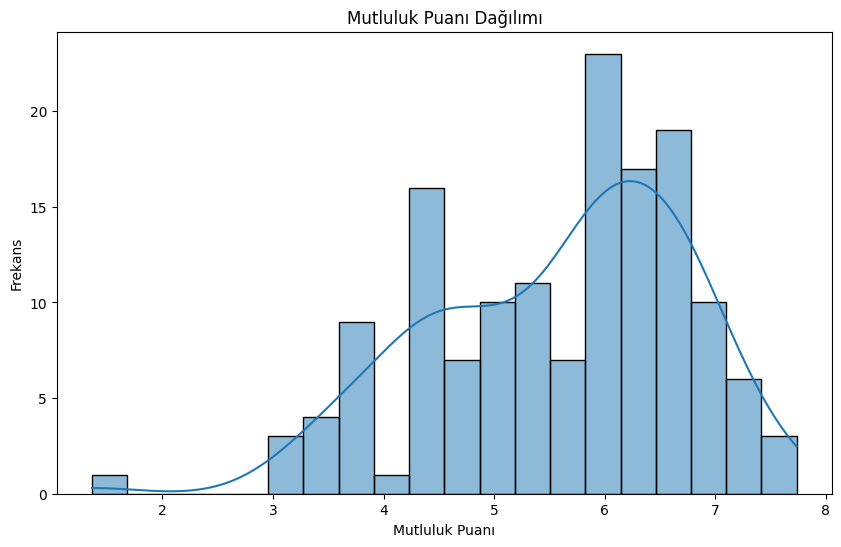

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ladder_score'], kde=True, bins=20)
plt.title('Mutluluk Puanı Dağılımı')
plt.xlabel('Mutluluk Puanı')
plt.ylabel('Frekans')
plt.show()

## Mutluluk Puanı ve Kişi Başına Düşen GSYİH

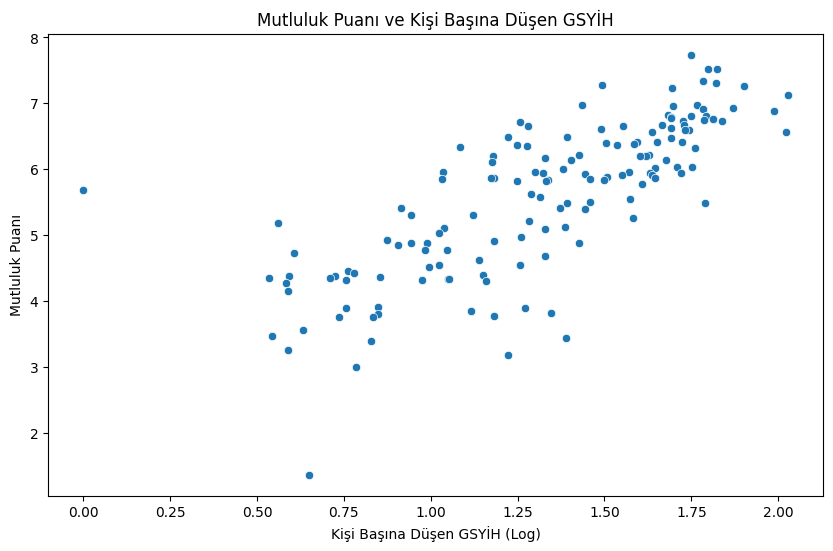

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_capita', y='Ladder_score', data=df)
plt.title('Mutluluk Puanı ve Kişi Başına Düşen GSYİH')
plt.xlabel('Kişi Başına Düşen GSYİH (Log)')
plt.ylabel('Mutluluk Puanı')
plt.show()

## Korelasyon Isı Haritası

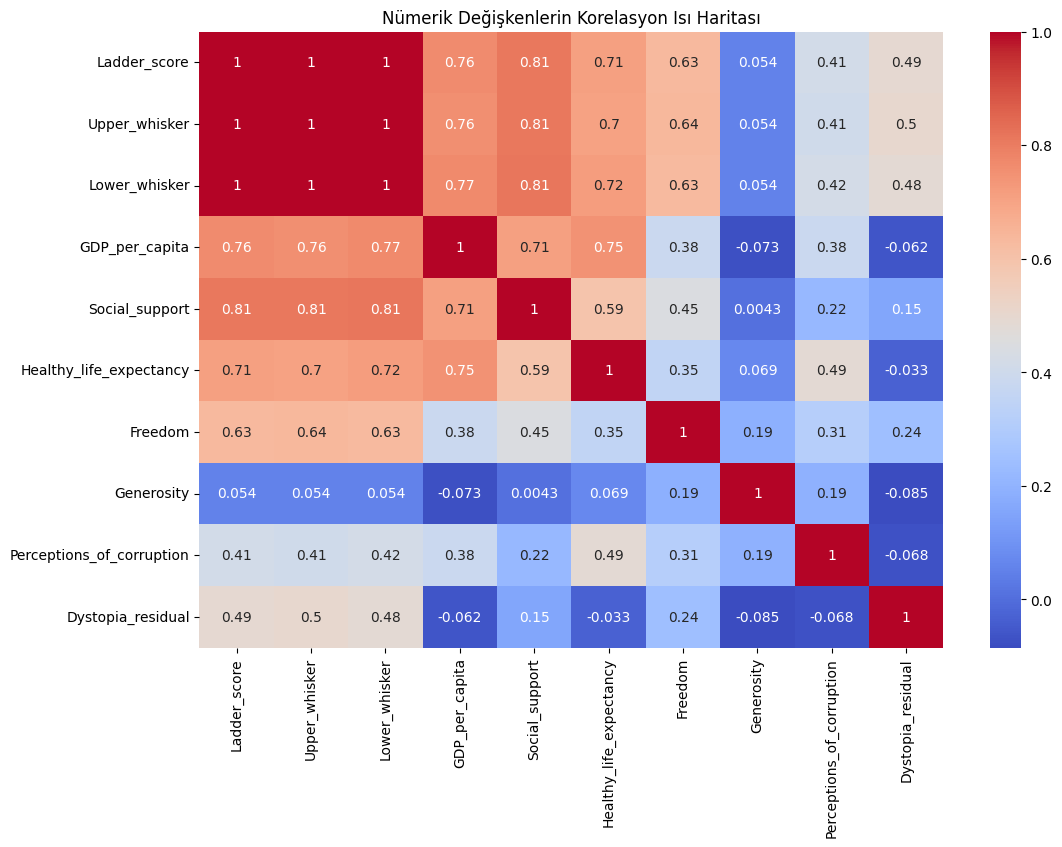

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Nümerik Değişkenlerin Korelasyon Isı Haritası')
plt.show()

## Ülkelere Göre Mutluluk Puanı

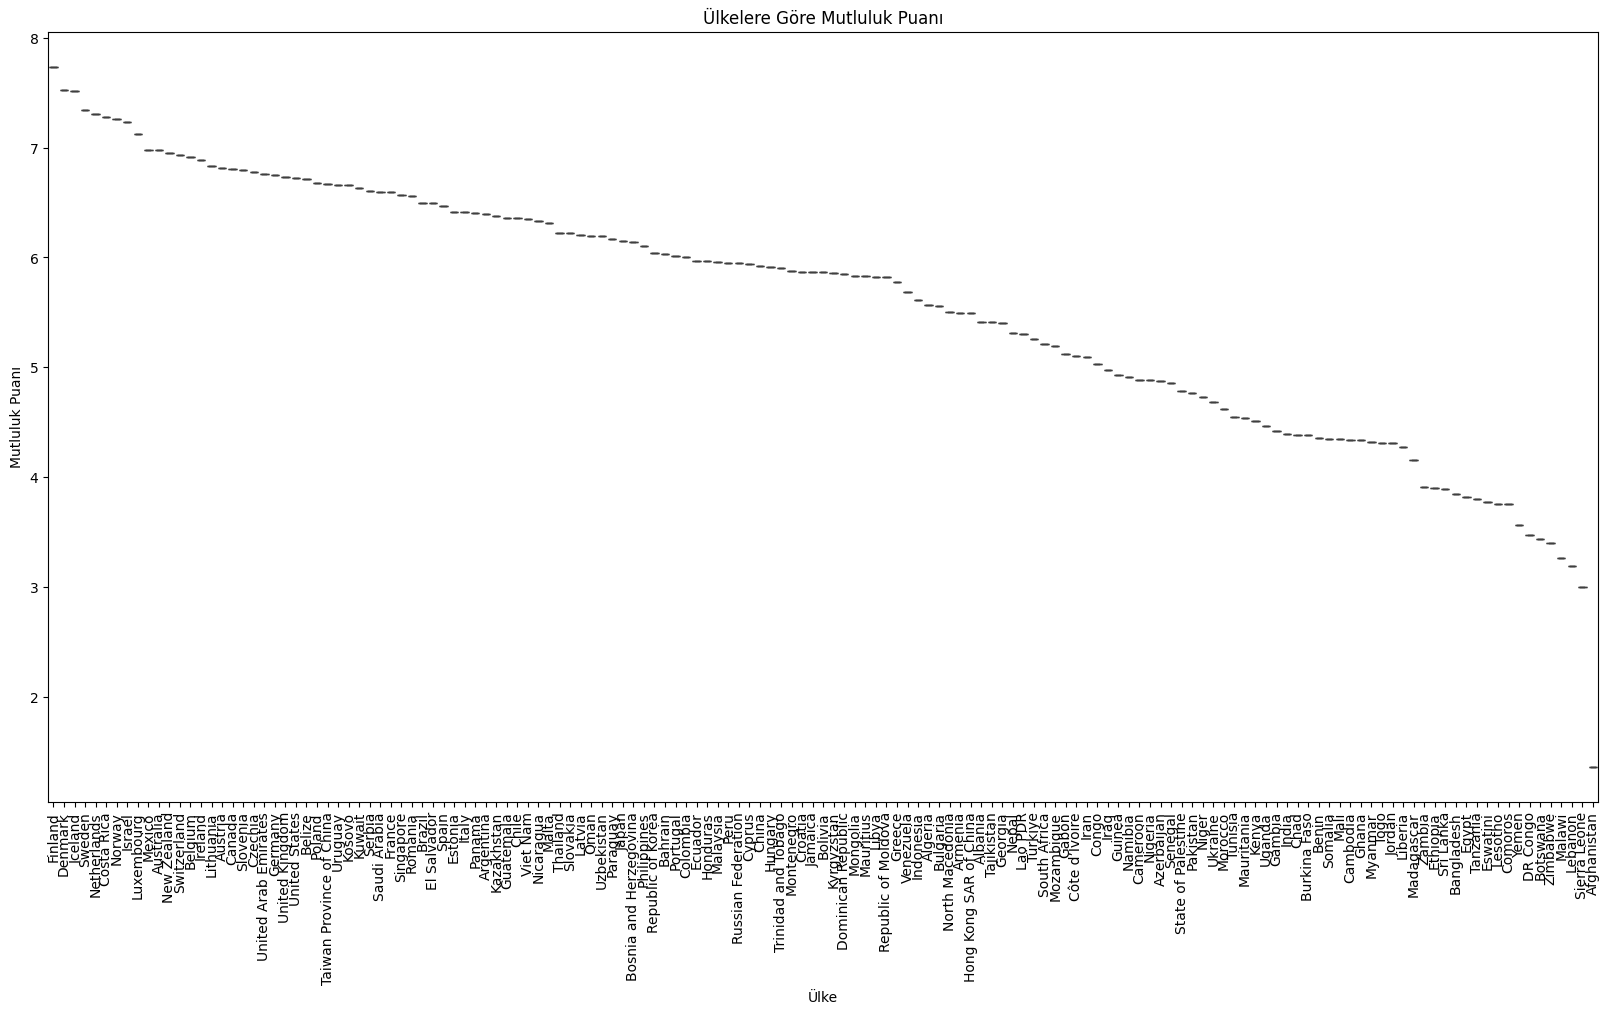

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Country', y='Ladder_score', data=df)
plt.xticks(rotation=90)
plt.title('Ülkelere Göre Mutluluk Puanı')
plt.xlabel('Ülke')
plt.ylabel('Mutluluk Puanı')
plt.show()

## En Mutlu ve En Mutsuz 10 Ülke

C:\Users\S_05_\AppData\Local\Temp\ipykernel_24072\3175710775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder_score', y='Country', data=top_10, palette='viridis')
C:\Users\S_05_\AppData\Local\Temp\ipykernel_24072\3175710775.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder_score', y='Country', data=bottom_10, palette='inferno')


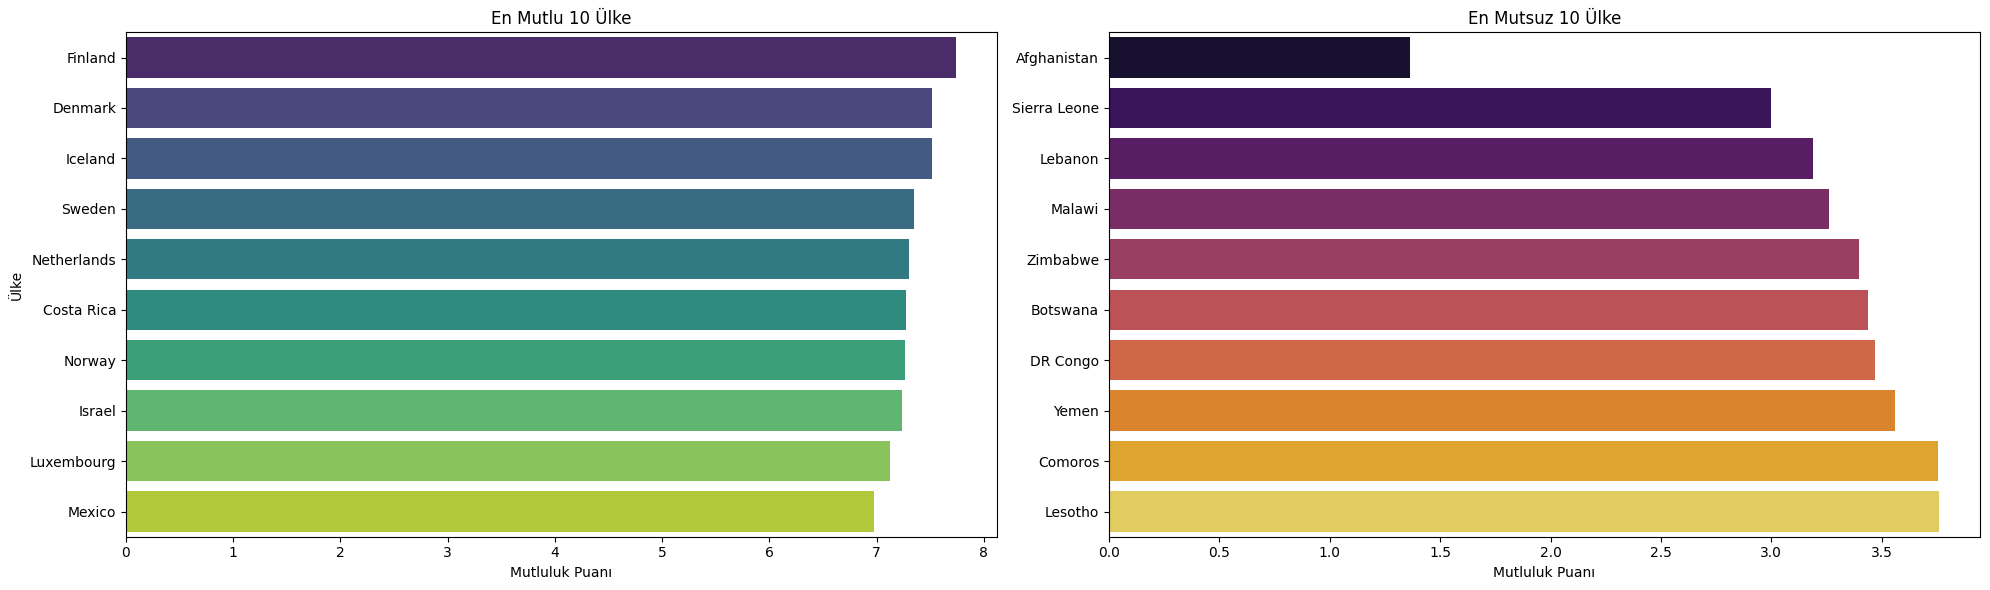

In [12]:
top_10 = df.nlargest(10, 'Ladder_score')
bottom_10 = df.nsmallest(10, 'Ladder_score')

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Ladder_score', y='Country', data=top_10, palette='viridis')
plt.title('En Mutlu 10 Ülke')
plt.xlabel('Mutluluk Puanı')
plt.ylabel('Ülke')

plt.subplot(1, 2, 2)
sns.barplot(x='Ladder_score', y='Country', data=bottom_10, palette='inferno')
plt.title('En Mutsuz 10 Ülke')
plt.xlabel('Mutluluk Puanı')
plt.ylabel('')

plt.tight_layout()
plt.show()

## Mutluluk Puanını Etkileyen Faktörler

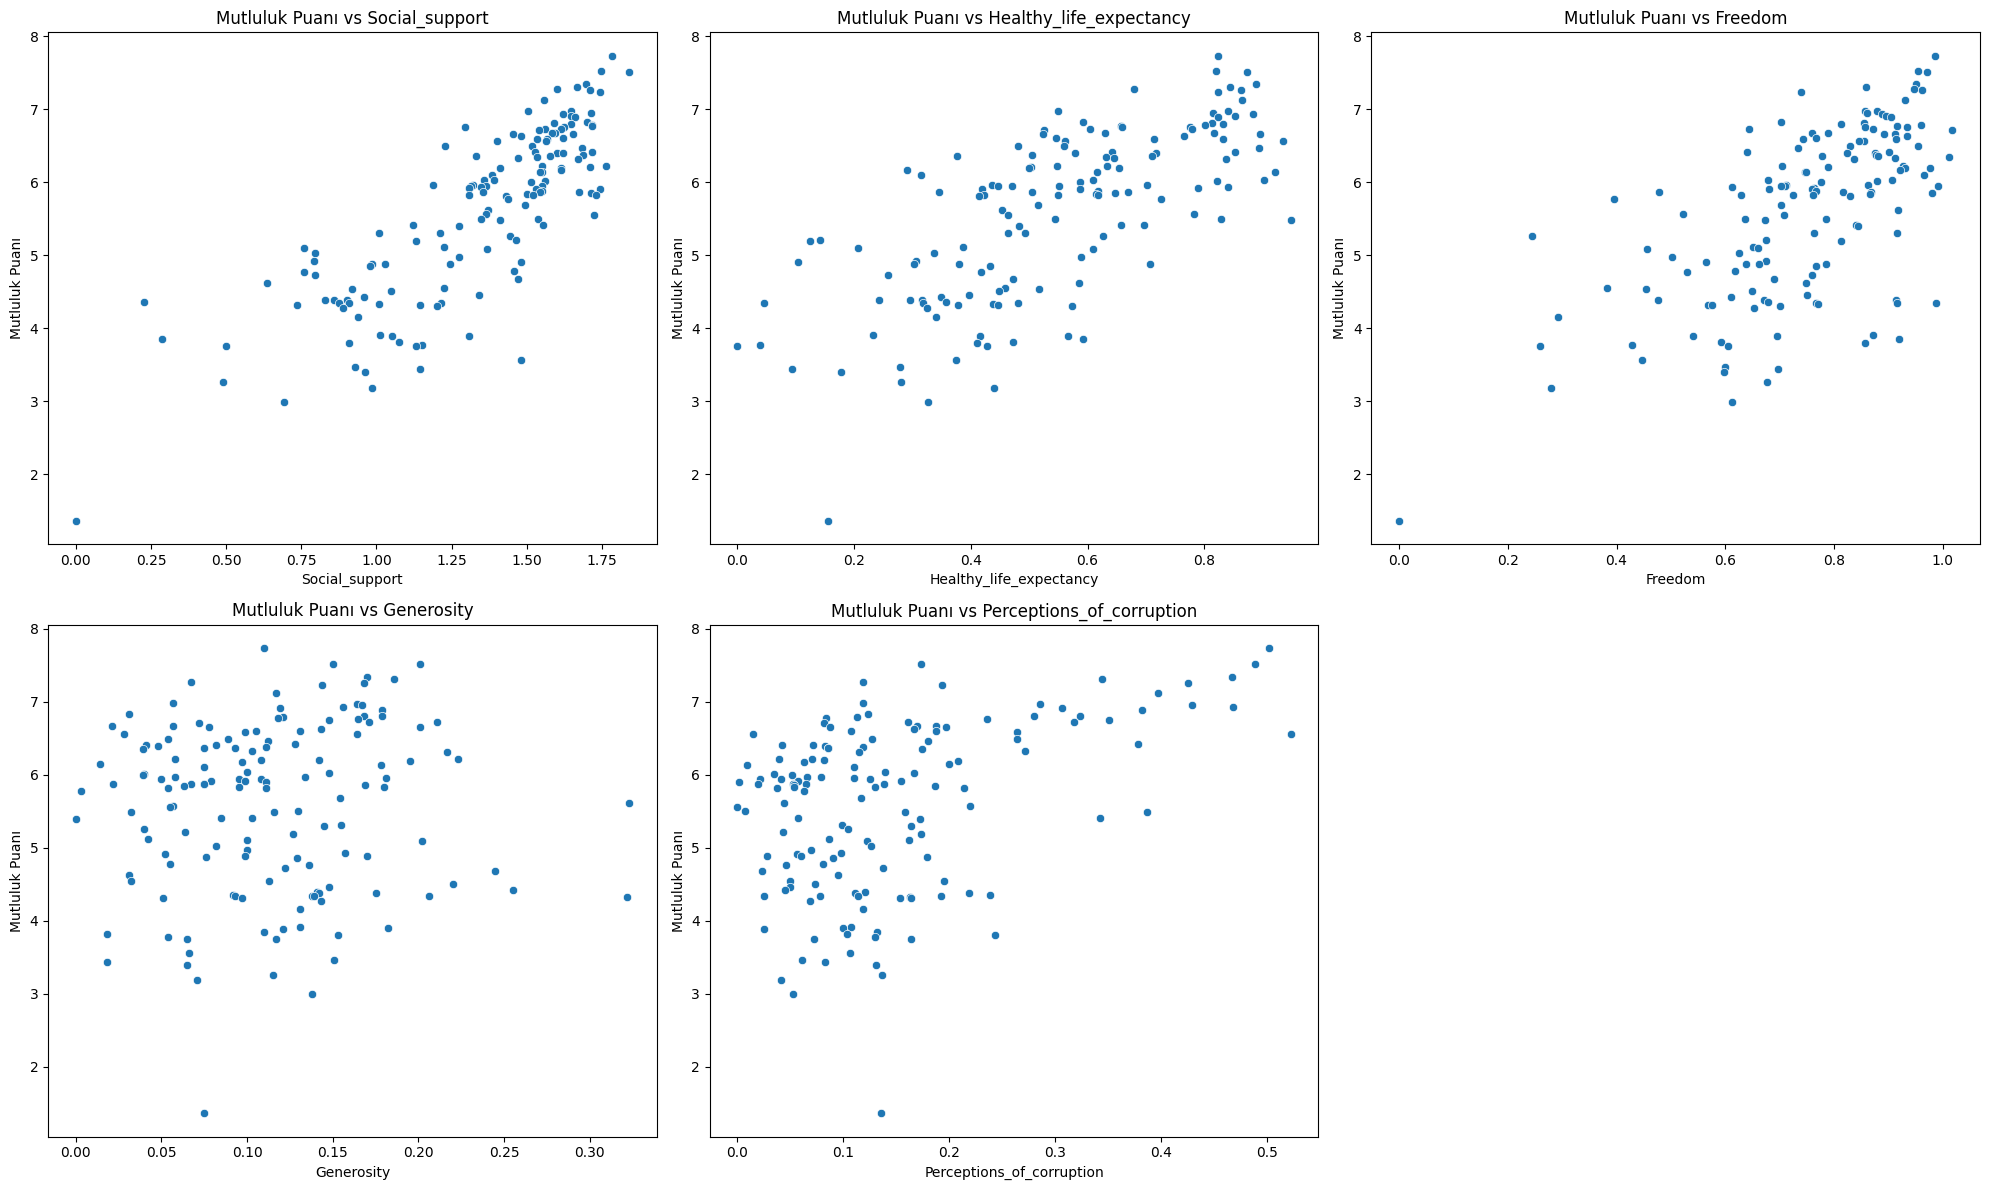

In [13]:
factors = ['Social_support', 'Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_corruption']

plt.figure(figsize=(20, 12))

for i, factor in enumerate(factors):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=factor, y='Ladder_score', data=df)
    plt.title(f'Mutluluk Puanı vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Mutluluk Puanı')

plt.tight_layout()
plt.show()

## Dünya Mutluluk Haritası

In [14]:
try:
    import plotly.express as px
except ImportError:
    !pip install plotly
    import plotly.express as px

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Ladder_score',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Dünya Mutluluk Haritası'
)

fig.show()

## Değişkenlerin İkili İlişkileri

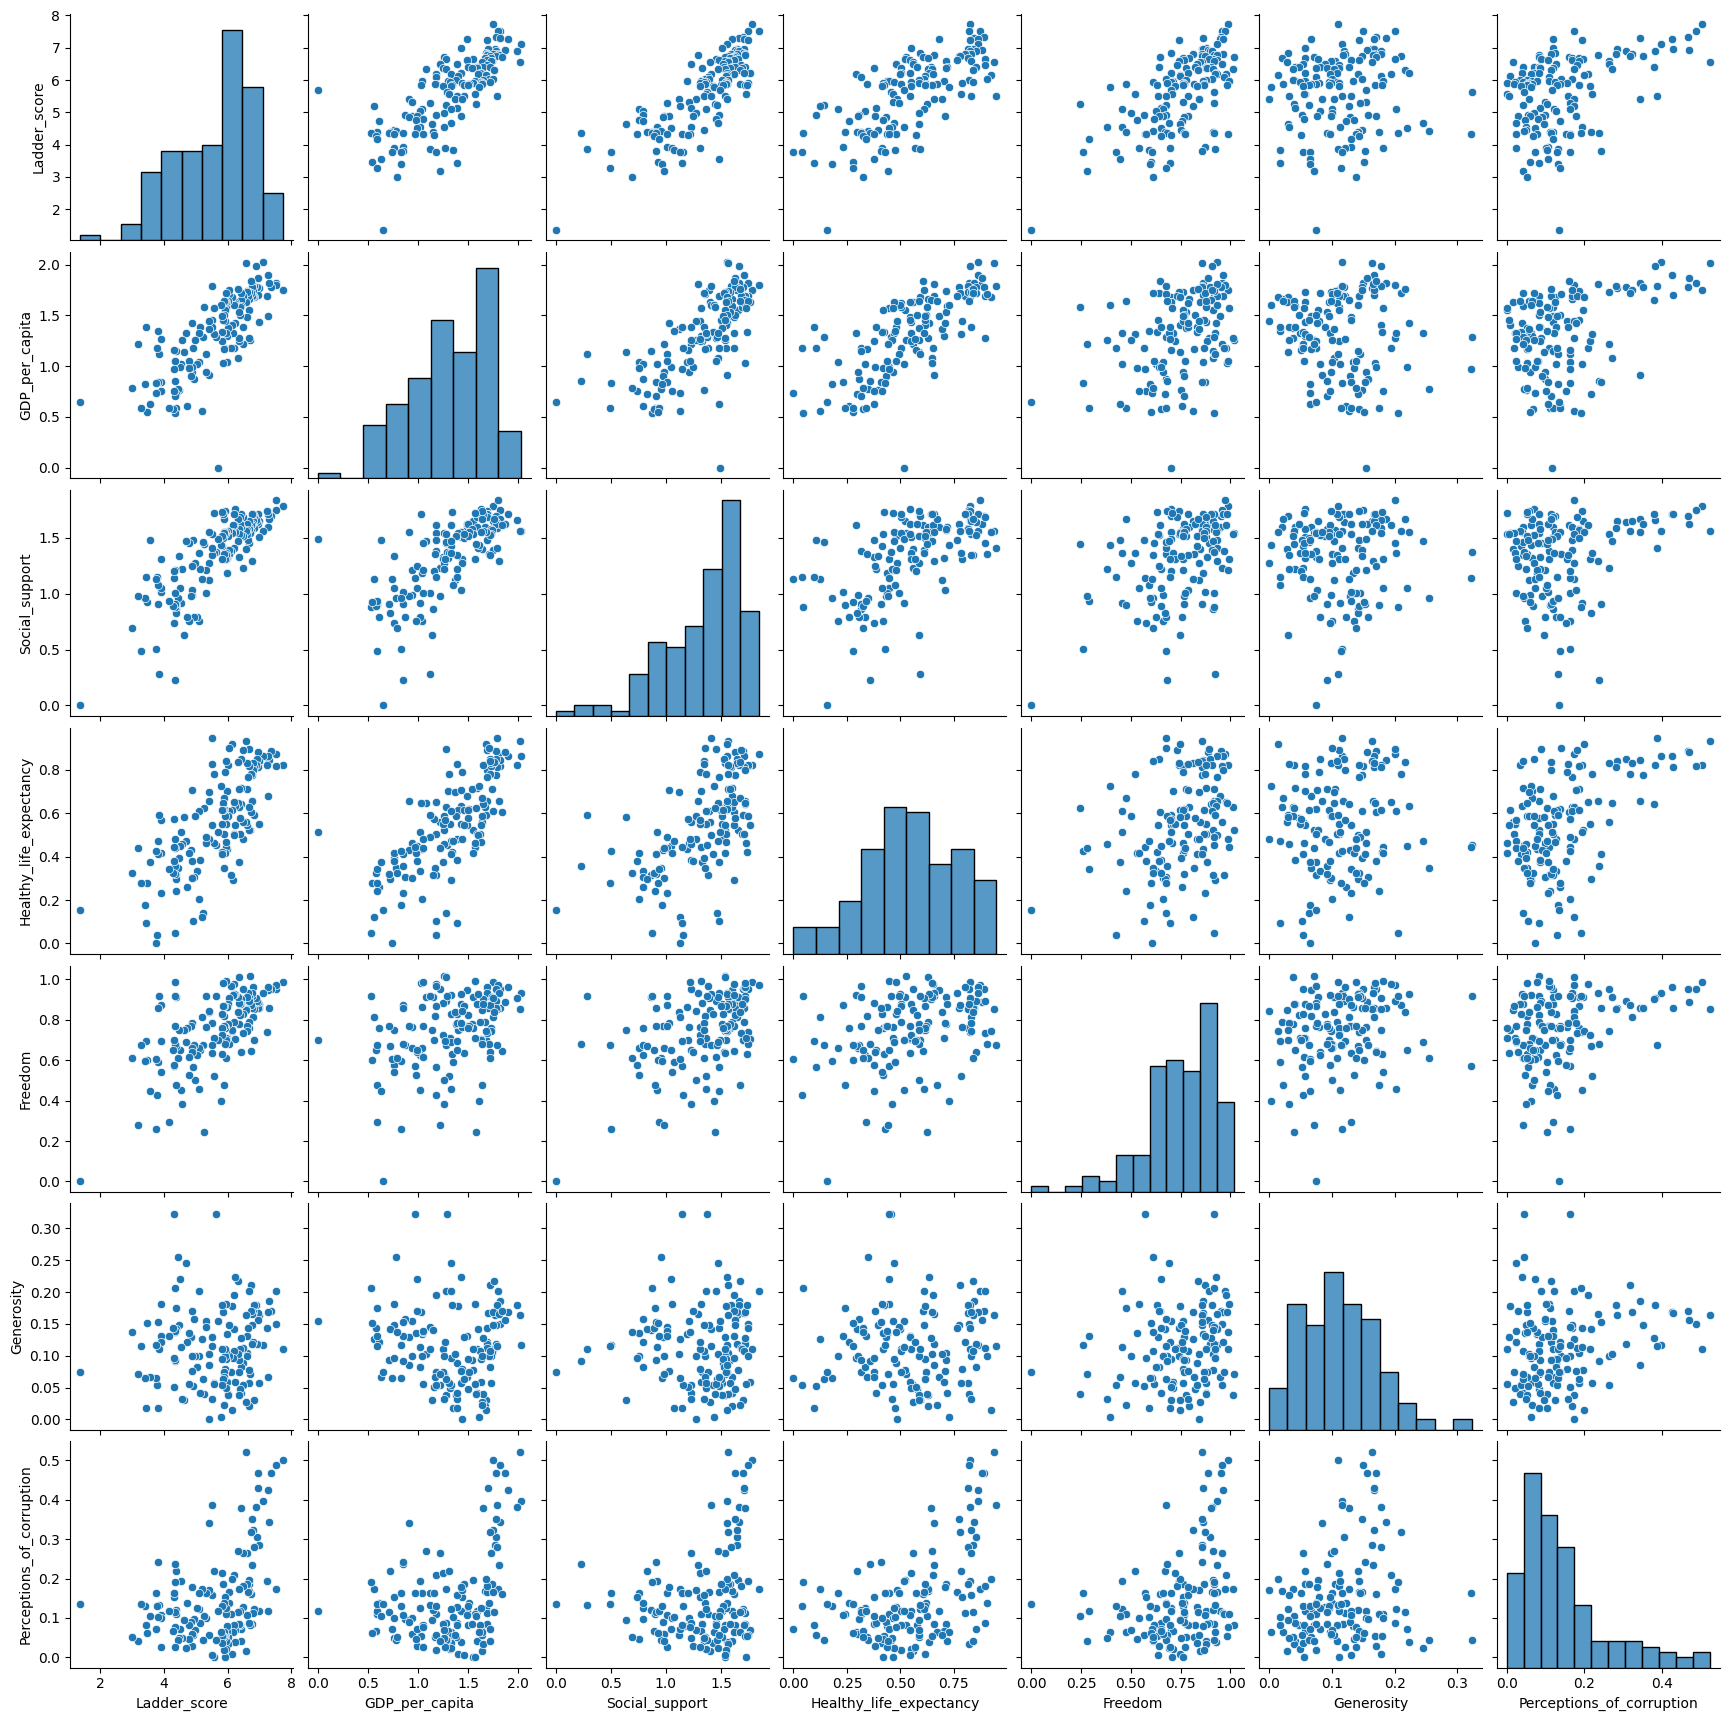

In [15]:
sns.pairplot(df[[
    'Ladder_score', 'GDP_per_capita', 'Social_support', 
    'Healthy_life_expectancy', 'Freedom', 'Generosity', 
    'Perceptions_of_corruption'
]])
plt.show()